In [1]:
import prep as p
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error

In [36]:
# Data Preparation and Cleaning
df = p.prepared_df()
df.head()



,ID,Age,Nationality,Overall,Potential,Club,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Inches,num_position,enum_d_work_rate,enum_o_work_rate,norm_wage,norm_value,total_stats,power_foot_num,Days_at_Club,enum_weights
0,158023,31,Argentina,94,94,FC Barcelona,5.0,4.0,4.0,10.0,...,67,3,1,1,565.0,110500.0,2244.0,1,5366,159
1,20801,33,Portugal,94,94,Juventus,5.0,4.0,5.0,7.0,...,74,3,0,2,405.0,77000.0,2265.0,0,244,183
2,190871,26,Brazil,92,93,Paris Saint-Germain,5.0,5.0,5.0,10.0,...,69,3,1,2,290.0,118500.0,2178.0,0,585,150
3,193080,27,Spain,91,93,Manchester United,4.0,3.0,1.0,1.0,...,76,0,1,1,260.0,72000.0,2220.0,0,2810,168
4,192985,27,Belgium,91,92,Manchester City,4.0,5.0,4.0,7.0,...,71,2,2,2,355.0,102000.0,2313.0,0,1289,154


In [3]:
enum_df = p.enum_strings(df)
nation_idx = p.string_indices(df, 'Nationality')
club_idx = p.string_indices(df,'Club')
# nation_idx
# for i,v in enum_df.iterrows():
#      print(nation_idx[nation_idx['index'] == v['num_nation']]['value'])


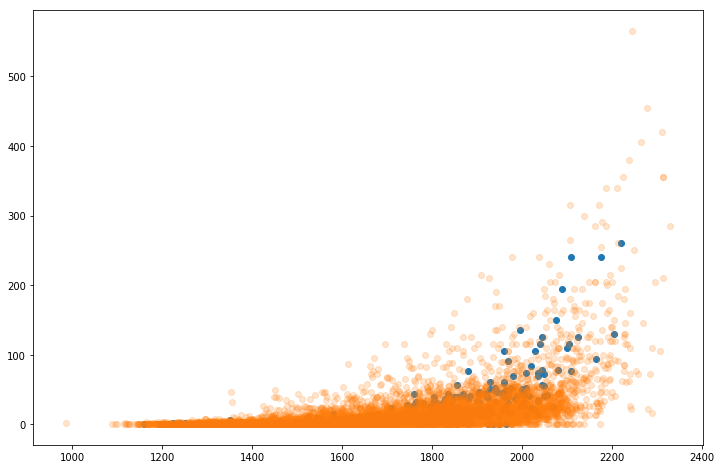

In [4]:
plt.figure(figsize=(12,8))
goalkeepers = df[df.num_position == 0]
fielders = df[df.num_position != 0]
plt.scatter(goalkeepers['total_stats'], goalkeepers['norm_wage'])
plt.scatter(fielders['total_stats'], fielders['norm_wage'], alpha=.2)

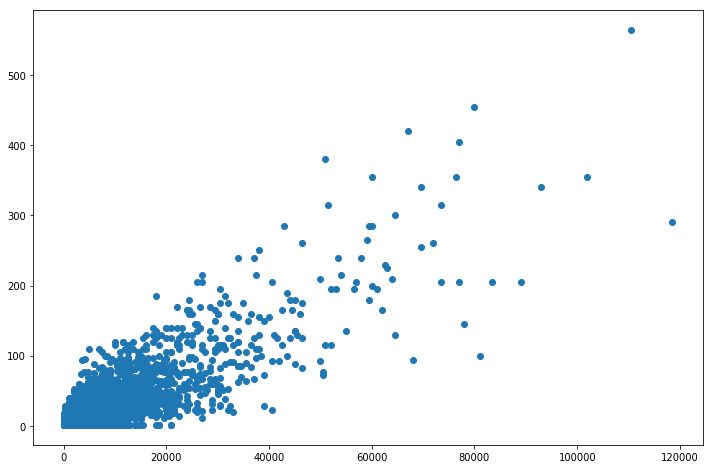

In [5]:
plt.figure(figsize=(12,8))
plt.scatter(df['norm_value'], df['norm_wage'])

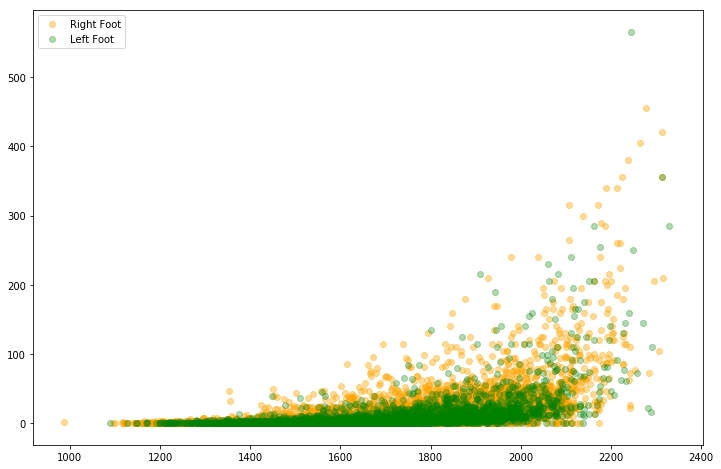

In [40]:
plt.figure(figsize=(12,8))
right = df[df.power_foot_num == 0]
left = df[df.power_foot_num == 1]
plt.scatter(right['total_stats'], right['norm_wage'],color='orange', alpha=.4, label='Right Foot')
plt.scatter(left['total_stats'], left['norm_wage'],color='green', alpha=.3, label='Left Foot')
plt.legend()

In [37]:
countries = df.groupby('Nationality')
sorted_countries = countries.size().sort_values(ascending=False)[0:20].astype(str)
sorted_countries
# countries = df[df['Nationality'] in sorted_countries]
# plt.bar(countries, df['norm_wage'])

Nationality
England                1477
Germany                1151
Spain                   974
France                  854
Argentina               833
Brazil                  789
Italy                   579
Colombia                571
Japan                   458
Netherlands             426
Sweden                  384
China PR                378
Chile                   352
Republic of Ireland     344
United States           336
Poland                  334
Norway                  334
Mexico                  332
Denmark                 322
Korea Republic          315
dtype: object

# Model Scatter Plots

Text(0, 0.5, 'Predicted')

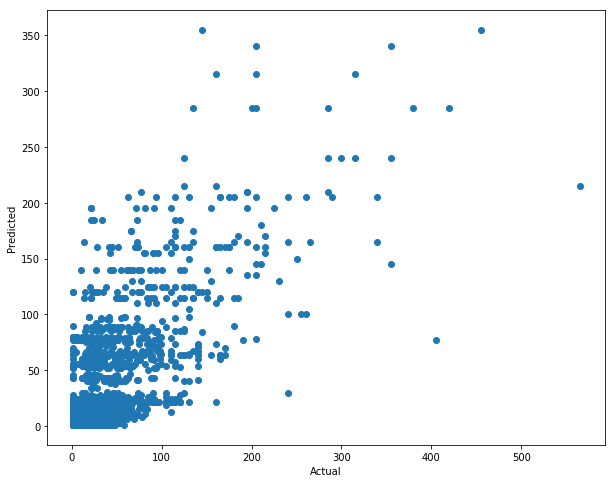

In [12]:
## GAUSSIAN NAIVE BAYES
data = pd.read_csv('./model_predictions/GaussianNB.csv')
plt.figure(figsize=(10,8))
plt.scatter(data['norm_wage'], data['0'])
plt.title("Guassian Naive-Bayes Predictions")
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [24]:
data.fillna(value=0, inplace=True)
print("Mean absolute error: " + str(mean_absolute_error(data['norm_wage'],data['0'])))

Mean absolute error: 5.831752131620031


Text(0, 0.5, 'Predicted')

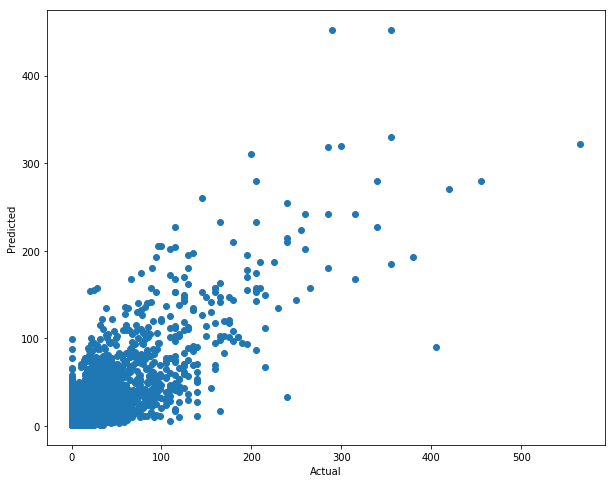

In [26]:
data = pd.read_csv('./model_predictions/KNeighborsRegressor.csv')
plt.figure(figsize=(10,8))
plt.scatter(data['norm_wage'], data['0'])
plt.title("K-Neighbors Regressor Predictions")
plt.xlabel('Actual')
plt.ylabel("Predicted")

In [28]:
data.fillna(value=0, inplace=True)
print("Mean absolute error: " + str(mean_absolute_error(data['norm_wage'],data['0'])))

Mean absolute error: 5.320838837516512


Text(0, 0.5, 'Predicted')

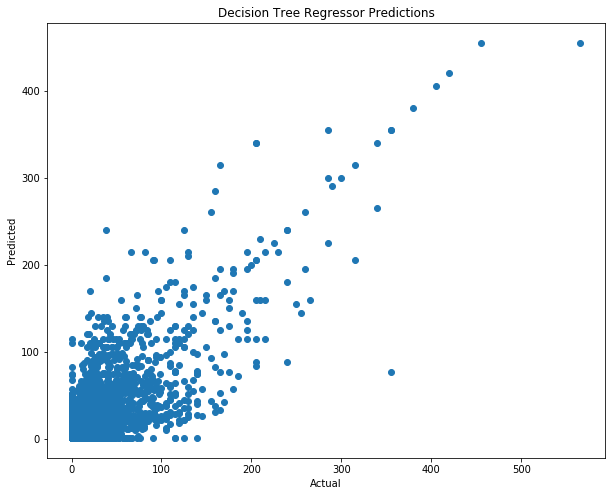

In [29]:
data = pd.read_csv('./model_predictions/DecisionTreeRegressor.csv')
plt.figure(figsize=(10,8))
plt.scatter(data['norm_wage'], data['0'])
plt.title("Decision Tree Regressor Predictions")
plt.xlabel('Actual')
plt.ylabel("Predicted")

In [30]:
data.fillna(value=0, inplace=True)
print("Mean absolute error: " + str(mean_absolute_error(data['norm_wage'],data['0'])))

Mean absolute error: 5.871802569953164


Text(0, 0.5, 'Predicted')

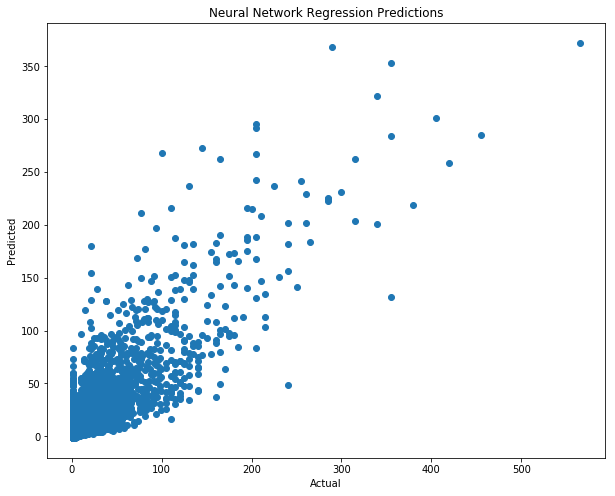

In [33]:
data = pd.read_csv('./model_predictions/MLPRegressor.csv')
plt.figure(figsize=(10,8))
plt.scatter(data['norm_wage'], data['0'])
plt.title("Neural Network Regression Predictions")
plt.xlabel('Actual')
plt.ylabel("Predicted")

In [34]:
data.fillna(value=0, inplace=True)
print("Mean absolute error: " + str(mean_absolute_error(data['norm_wage'],data['0'])))

Mean absolute error: 4.881568012768382


Text(0, 0.5, 'Predicted')

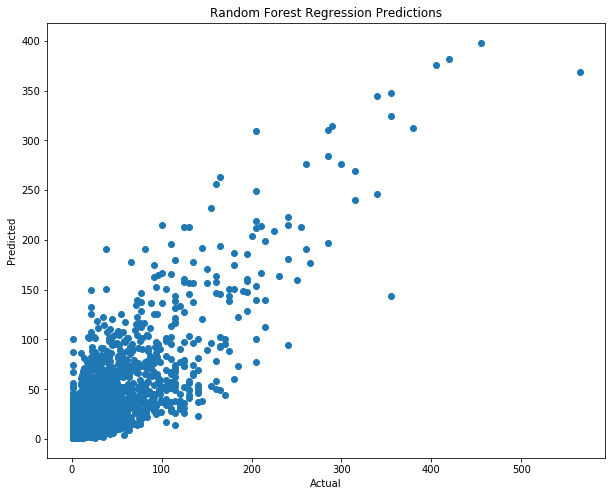

In [41]:
data = pd.read_csv('./model_predictions/RandomForestRegressor.csv')
plt.figure(figsize=(10,8))
plt.scatter(data['norm_wage'], data['0'])
plt.title("Random Forest Regression Predictions")
plt.xlabel('Actual')
plt.ylabel("Predicted")

In [42]:
data.fillna(value=0, inplace=True)
print("Mean absolute error: " + str(mean_absolute_error(data['norm_wage'],data['0'])))

Mean absolute error: 5.052629398342741
